## CleanAir Quest Air Pollution Monitoring Project
### - In this notebook, we will load the data received from querying the OpenWeatherMap API and conduct exploratory data analysis to ensure the data is consistent, clean and high quality.
### - We will then build a model using the data to identify the optimal location for our pollution monitoring station.

### Loading the data
We read all the json files and merge them into a dataframe

In [78]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [79]:
# Add all json files in the Data directory to a list
file_path = 'Data/'
json_files = [file for file in os.listdir(file_path) if file.endswith('.json')]

# Load data into pandas and create dictionary to hold all dataframes
dataframes = {}
for file in json_files:
    f_path = os.path.join(file_path, file)
    with open(f_path, 'r') as temp:
        data = json.load(temp)  
        df = pd.DataFrame(data['list'])
        df['lat'] = data['coord']['lat']
        df['lon'] = data['coord']['lon']
        dataframes[file.split('.json')[0]] = df

In [80]:
# Create one dataframe
air_pollution_df = pd.concat(dataframes.values(), ignore_index=True)
air_pollution_df.head(10)

,main,components,dt,lat,lon
0,{'aqi': 2},"{'co': 580.79, 'no': 0.53, 'no2': 5.1, 'o3': 4...",1609488000,-1.2837,36.7494
1,{'aqi': 1},"{'co': 554.09, 'no': 0.41, 'no2': 5.4, 'o3': 3...",1609491600,-1.2837,36.7494
2,{'aqi': 1},"{'co': 494, 'no': 0.34, 'no2': 5.4, 'o3': 36.1...",1609495200,-1.2837,36.7494
3,{'aqi': 1},"{'co': 447.27, 'no': 0.33, 'no2': 4.63, 'o3': ...",1609498800,-1.2837,36.7494
4,{'aqi': 1},"{'co': 403.88, 'no': 0.3, 'no2': 3.98, 'o3': 3...",1609502400,-1.2837,36.7494
5,{'aqi': 1},"{'co': 420.57, 'no': 0.31, 'no2': 4.93, 'o3': ...",1609506000,-1.2837,36.7494
6,{'aqi': 1},"{'co': 467.3, 'no': 0.3, 'no2': 6.43, 'o3': 25...",1609509600,-1.2837,36.7494
7,{'aqi': 1},"{'co': 500.68, 'no': 0.19, 'no2': 7.54, 'o3': ...",1609513200,-1.2837,36.7494
8,{'aqi': 1},"{'co': 547.41, 'no': 0.05, 'no2': 7.97, 'o3': ...",1609516800,-1.2837,36.7494
9,{'aqi': 2},"{'co': 600.82, 'no': 0.04, 'no2': 8.05, 'o3': ...",1609520400,-1.2837,36.7494


### Cleaning the Data

In [81]:
air_pollution_df.rename(columns={'main':'air_quality_index'}, inplace=True)

In [82]:
air_pollution_df['air_quality_index'] = air_pollution_df['air_quality_index'].str['aqi']

In [83]:
# Create columns for each component of Air Pollution
air_pollution_df['CO_conc'] = air_pollution_df['components'].str['co']
air_pollution_df['NO_conc'] = air_pollution_df['components'].str['no']
air_pollution_df['NO2_conc'] = air_pollution_df['components'].str['no2']
air_pollution_df['O3_conc'] = air_pollution_df['components'].str['o3']
air_pollution_df['SO2_conc'] = air_pollution_df['components'].str['so2']
air_pollution_df['fine_prtcls'] = air_pollution_df['components'].str['pm2_5']
air_pollution_df['coarse_prtcls'] = air_pollution_df['components'].str['pm10']
air_pollution_df['ammonia'] = air_pollution_df['components'].str['nh3']


In [84]:
# Convert unix time to datetime
air_pollution_df['datetime'] = pd.to_datetime(air_pollution_df['dt'], unit='s')

In [85]:
# Drop the 'components' column
air_pollution_df.drop(columns=['components','dt'], inplace=True)

In [86]:
air_pollution_df.shape

(155862, 12)

In [10]:
air_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155862 entries, 0 to 155861
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   air_quality_index  155862 non-null  int64         
 1   lat                155862 non-null  float64       
 2   lon                155862 non-null  float64       
 3   CO_conc            155862 non-null  float64       
 4   NO_conc            155862 non-null  float64       
 5   NO2_conc           155862 non-null  float64       
 6   O3_conc            155862 non-null  float64       
 7   SO2_conc           155862 non-null  float64       
 8   fine_prtcls        155862 non-null  float64       
 9   coarse_prtcls      155862 non-null  float64       
 10  ammonia            155862 non-null  float64       
 11  datetime           155862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 14.3 MB


In [88]:
#Convert lat and lon to string objects
air_pollution_df[['lat','lon']] = air_pollution_df[['lat','lon']].astype(str)

In [119]:
# Create year, 
air_pollution_df['year'] = air_pollution_df['datetime'].dt.year
air_pollution_df['month'] = air_pollution_df['datetime'].dt.month
air_pollution_df['day'] = air_pollution_df['datetime'].dt.day

In [120]:
air_pollution_df.head()

,air_quality_index,lat,lon,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,datetime,year,month,day
0,2,-1.2837,36.7494,580.79,0.53,5.10,42.92,6.32,9.98,21.97,6.14,2021-01-01 08:00:00,2021,1,1
1,1,-1.2837,36.7494,554.09,0.41,5.40,39.34,6.91,7.78,18.73,6.46,2021-01-01 09:00:00,2021,1,1
2,1,-1.2837,36.7494,494.00,0.34,5.40,36.12,6.91,5.88,15.08,6.21,2021-01-01 10:00:00,2021,1,1
3,1,-1.2837,36.7494,447.27,0.33,4.63,34.69,5.96,4.63,12.55,5.70,2021-01-01 11:00:00,2021,1,1
4,1,-1.2837,36.7494,403.88,0.30,3.98,31.83,4.83,3.60,10.23,5.00,2021-01-01 12:00:00,2021,1,1


In [89]:
air_pollution_df.describe()

,air_quality_index,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,datetime
count,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862
mean,2.559136,781.939603,0.618114,7.822798,34.584194,5.290381,21.972173,43.818366,10.537128,2021-12-30 11:14:30.793393920
min,1.000000,161.890000,0.000000,0.200000,0.000000,0.050000,0.500000,3.870000,0.830000,2021-01-01 08:00:00
25%,2.000000,480.650000,0.000000,3.900000,18.780000,2.620000,8.110000,20.820000,6.210000,2021-07-01 17:00:00
50%,2.000000,627.520000,0.080000,6.080000,28.610000,4.470000,13.550000,32.290000,8.990000,2021-12-29 02:30:00
75%,4.000000,894.550000,0.370000,9.510000,44.700000,6.740000,23.290000,50.850000,13.170000,2022-06-29 12:00:00
max,5.000000,8331.300000,98.350000,108.300000,223.160000,34.810000,577.470000,713.550000,95.250000,2022-12-31 21:00:00
std,1.238163,558.384853,3.529935,6.601002,23.647428,3.921184,32.814811,44.750703,6.224913,NaN


### Removing Outliers
From the summary statistics, there are clear outliers in all components of air quality present in the dataset.\
We dive deeper into the specific attributes and drop any outliers that may affect the quality of our analysis.

In [90]:
# Validate the air quality index to ensure all entries have figures between 1 and 5.
air_pollution_df['air_quality_index'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [91]:
# Validate the lat and lon columns to ensure only 9 unique entries are available, representing our 9 locations.
print(air_pollution_df['lon'].unique())
print(air_pollution_df['lat'].unique())

['36.7494' '36.7375' '36.8958' '36.7368' '36.8722' '36.8504' '36.8899'
 '36.8264' '36.8032']
['-1.2837' '-1.2959' '-1.2229' '-1.3534' '-1.293' '-1.2608' '-1.2204'
 '-1.2905' '-1.2629']


In [15]:
air_pollution_df.sample(5)

,air_quality_index,lat,lon,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,datetime
109058,2,-1.2204,36.8899,600.82,0.00,7.11,32.90,7.21,10.83,26.97,8.87,2021-08-04 22:00:00
114338,3,-1.2204,36.8899,567.44,0.00,4.46,25.75,1.71,14.47,36.03,10.89,2022-03-14 22:00:00
104431,1,-1.2204,36.8899,453.95,0.00,2.72,25.03,2.53,3.59,8.03,3.64,2021-01-23 03:00:00
36530,2,-1.2229,36.8958,634.19,1.08,7.37,11.36,6.44,10.24,25.43,8.23,2021-03-22 06:00:00
44338,2,-1.2229,36.8958,480.65,0.54,4.16,64.37,6.56,12.32,33.17,7.60,2022-02-11 14:00:00


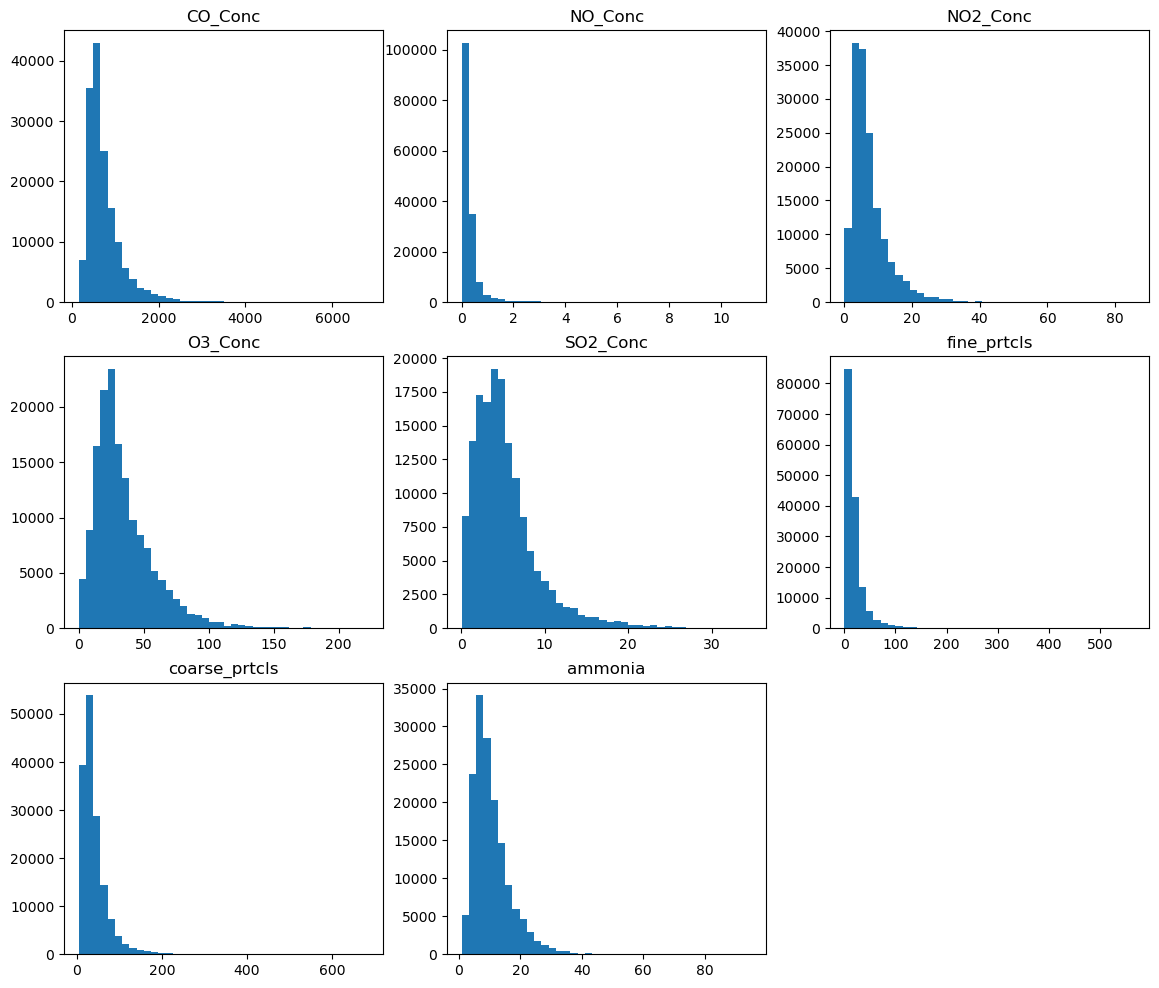

In [107]:
# Use histograms to check distributions for skewness.

plt.figure(figsize = (14,12))
# plot 1
plt.subplot(3, 3, 1)
plt.hist(air_pollution_df.CO_conc, bins = 40);
plt.title('CO_Conc')
# plot 2
plt.subplot(3, 3, 2)
plt.hist(air_pollution_df.NO_conc, bins = 40);
plt.title('NO_Conc')
# plot 3
plt.subplot(3, 3, 3)
plt.hist(air_pollution_df.NO2_conc, bins = 40);
plt.title('NO2_Conc')
# plot 4
plt.subplot(3, 3, 4)
plt.hist(air_pollution_df.O3_conc, bins = 40);
plt.title('O3_Conc')
# plot 5
plt.subplot(3, 3, 5)
plt.hist(air_pollution_df.SO2_conc, bins = 40);
plt.title('SO2_Conc')
# plot 6
plt.subplot(3, 3, 6)
plt.hist(air_pollution_df.fine_prtcls, bins = 40);
plt.title('fine_prtcls')
# plot 7
plt.subplot(3, 3, 7)
plt.hist(air_pollution_df.coarse_prtcls, bins = 40);
plt.title('coarse_prtcls')
# plot 8
plt.subplot(3, 3, 8)
plt.hist(air_pollution_df.ammonia, bins = 40);
plt.title('ammonia')

plt.show()

We shall use the standard deviation to select our outlier threshold.\
Any entries that are more than 3 SDs (**Z-score > 3**) away from the mean will be dropped.

In [111]:
# Function that returns a dataframe with columns filtered for outliers using the SD metric
column_list = ['CO_conc','NO_conc','NO2_conc','O3_conc','SO2_conc','fine_prtcls','coarse_prtcls','ammonia']
def filtered_df(columns, air_pollution_df):
    for column in columns:
        upper_l = air_pollution_df[column].mean() + air_pollution_df[column].std()*3
        lower_l = air_pollution_df[column].mean()-(air_pollution_df[column].std()*3)

        air_pollution_df = air_pollution_df[(air_pollution_df[column] < upper_l) & (air_pollution_df[column] > lower_l)]
    return air_pollution_df

In [109]:
filtered_air_pollution_df = filtered_df(column_list, air_pollution_df)

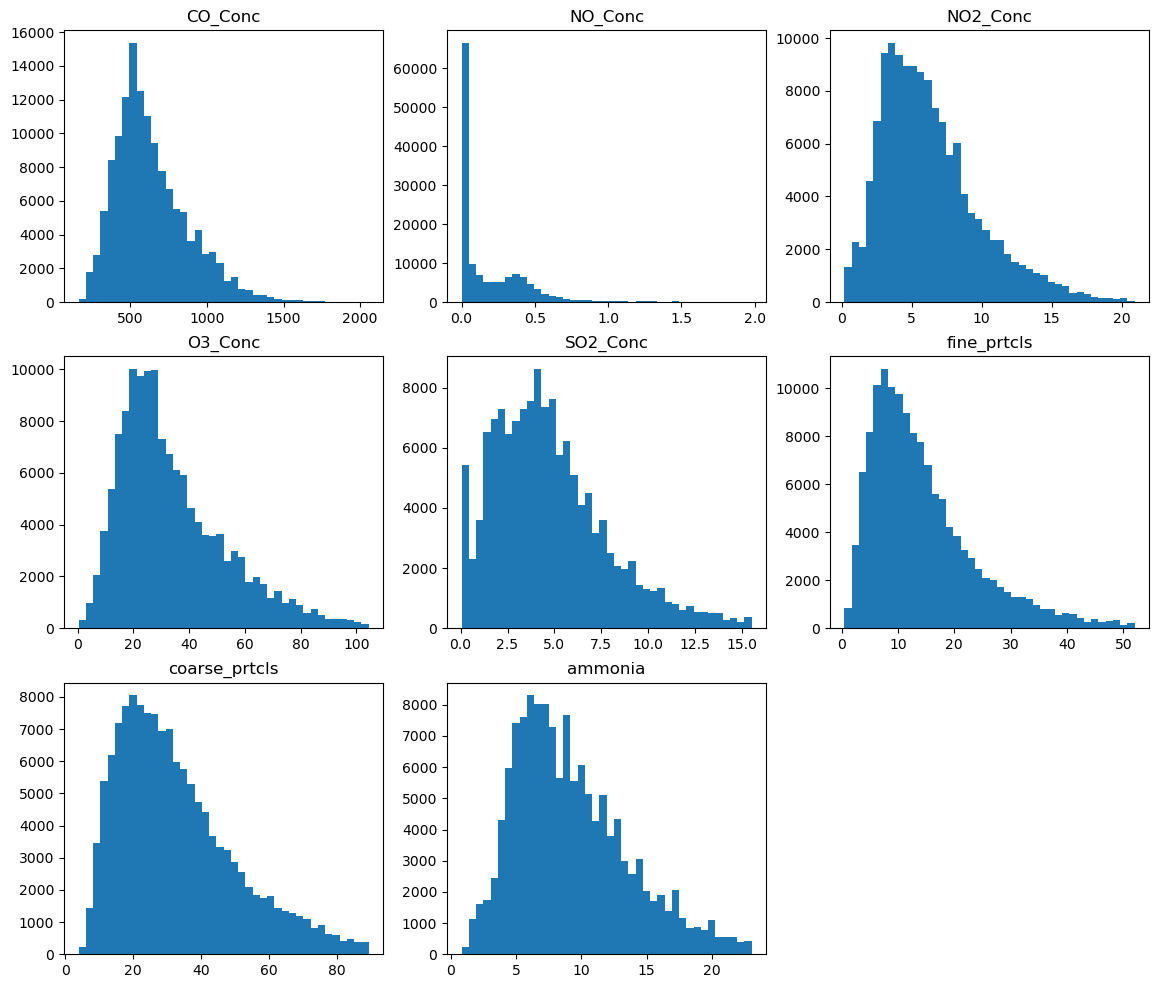

In [110]:
# Use histograms to check distributions for skewness.

plt.figure(figsize = (14,12))
# plot 1
plt.subplot(3, 3, 1)
plt.hist(filtered_air_pollution_df.CO_conc, bins = 40);
plt.title('CO_Conc')
# plot 2
plt.subplot(3, 3, 2)
plt.hist(filtered_air_pollution_df.NO_conc, bins = 40);
plt.title('NO_Conc')
# plot 3
plt.subplot(3, 3, 3)
plt.hist(filtered_air_pollution_df.NO2_conc, bins = 40);
plt.title('NO2_Conc')
# plot 4
plt.subplot(3, 3, 4)
plt.hist(filtered_air_pollution_df.O3_conc, bins = 40);
plt.title('O3_Conc')
# plot 5
plt.subplot(3, 3, 5)
plt.hist(filtered_air_pollution_df.SO2_conc, bins = 40);
plt.title('SO2_Conc')
# plot 6
plt.subplot(3, 3, 6)
plt.hist(filtered_air_pollution_df.fine_prtcls, bins = 40);
plt.title('fine_prtcls')
# plot 7
plt.subplot(3, 3, 7)
plt.hist(filtered_air_pollution_df.coarse_prtcls, bins = 40);
plt.title('coarse_prtcls')
# plot 8
plt.subplot(3, 3, 8)
plt.hist(filtered_air_pollution_df.ammonia, bins = 40);
plt.title('ammonia')

plt.show()